In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from PIL import Image
import numpy as geek
import ipyplot
import random
from skimage import transform
from skimage.transform import rotate, AffineTransform,warp
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage
import random
from skimage import img_as_ubyte
from skimage import exposure
from skimage.color import rgb2gray
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2


In [16]:
sample = []
f = open("sample_submission.txt", "r")
for i in f.readlines():
    sample.append(i.replace('\n', ''))
f.close()
np.array(sample)
test = []
f = open("test.txt", "r")  
for i in f.readlines():
    test.append(i.replace('\n', ''))
f.close()
test.remove('id')
test = np.array(test)
train = []
t = 0
f = open("train.txt", "r")
for i in f.readlines():
    ls = []
    for j in i.split(','):
        #print(j)
        ls.append(j.replace('\n', ''))
    train.append(ls)
    if train[t][1] != 'label':
        train[t][1] = float(train[t][1])
    t += 1
f.close()
train.remove(train[0])
train = np.array(train)
validation = []
v = 0
f = open("validation.txt", "r")
for i in f.readlines():
    ls = []
    for j in i.split(','):
        #print(j)
        ls.append(j.replace('\n', ''))
    validation.append(ls)
    if validation[v][1] != 'label':
        validation[v][1] = float(validation[v][1])
f.close()
validation.remove(validation[0])
validation = np.array(validation)

print(type(test))
#print(test)
print(validation)
print((train))


<class 'numpy.ndarray'>
[['QXCt1zn2loXWIAF.png' '5']
 ['C1FyRZi5eecIF8z.png' '5']
 ['LBG6pL8nwC0bWtp.png' '6']
 ...
 ['D2aI2YfJCz5BkXX.png' '1']
 ['1pbzYqeIGR1P7Dz.png' '3']
 ['N5KwahpFDqrevng.png' '0']]
[['uwOt9wnw5cOryBN.png' '2.0']
 ['tFoGtQbI1M2cqAQ.png' '1.0']
 ['fSfXhs3ZnmoMf2U.png' '1.0']
 ...
 ['G3RlsZfn7yBWFVM.png' '4.0']
 ['iKHI1w2mXyYcVdd.png' '3.0']
 ['Ebs1bbetkzd60Qm.png' '6.0']]


(1173, 16, 16, 3)
(2819, 16, 16, 3)
(8000, 16, 16, 3)
8000
8000
1173


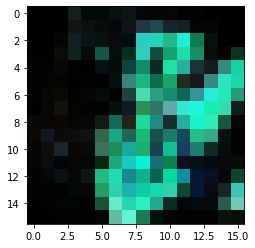

In [17]:
label = []
label_t = []
label_v = []
m = 0
imagini_train = []
imagini_validation = []
imagini_test = []
for i in range(len(train)):
    m += 1
    u = random.randrange(100,201)
    p = random.randrange(30,91)
    imagini_train.append(np.array(Image.open("./train+validation/" + train[i][0])))
#     imagini_train[i][:,:,0] = cv2.equalizeHist(imagini_train[i][:,:,0])
#     imagini_train[i]  = cv2.cvtColor(imagini_train[i] , cv2.COLOR_YUV2BGR)
#     imagini_train[i] = rotate(imagini_train[i], angle=p)
#     imagini_train[i] = rgb2gray(imagini_train[i])
#     v_min, v_max = np.percentile(imagini_train[i], (0.2, 90.5))
#    imagini_train[i] = exposure.rescale_intensity(imagini_train[i], in_range=(v_min, v_max))
#     tf = AffineTransform(translation=(-200,0))
#     imagini_train[i] = transform.warp(imagini_train[i],  tf,  mode='wrap')


    label_t.append(int(float(train[i][1])))
imagini_train = np.array(imagini_train)    
for i in range(len(validation)):
    u = random.randrange(100,201)
    p = random.randrange(30,91)
    imagini_validation.append(np.array(Image.open("./train+validation/" + validation[i][0])))
#     imagini_validation[i][:,:,0] = cv2.equalizeHist(imagini_validation[i][:,:,0])
#     imagini_validation[i]  = cv2.cvtColor(imagini_validation[i] , cv2.COLOR_YUV2BGR)
#     imagini_validation[i] = rotate(imagini_validation[i], angle=p)
#     imagini_validation[i] = rgb2gray(imagini_validation[i])
#     v_min, v_max = np.percentile(imagini_validation[i], (0.2, 90.5))
#     imagini_validation[i] = exposure.rescale_intensity(imagini_validation[i], in_range=(v_min, v_max))
#     tf = AffineTransform(translation=(-200,0))
#     imagini_validation[i] = transform.warp(imagini_validation[i],  tf,  mode='wrap')


    if validation[i][1] not in label:
        label.append(int(validation[i][1]))
    label_v.append(int(validation[i][1]))
imagini_validation = np.array(imagini_validation)      
for i in range(len(test)):
    u = random.randrange(100,201)
    p = random.randrange(30,91)
    imagini_test.append(np.array(Image.open("./test/" + test[i])))
#     imagini_test[i][:,:,0] = cv2.equalizeHist(imagini_test[i][:,:,0])
#     imagini_test[i]  = cv2.cvtColor(imagini_test[i] , cv2.COLOR_YUV2BGR)
#     v_min, v_max = np.percentile(imagini_test[i], (0.2, 90.5))
#     imagini_test[i] = rgb2gray(imagini_test[i])
#     imagini_test[i] = exposure.rescale_intensity(imagini_test[i], in_range=(v_min, v_max))
#     imagini_test[i] = rotate(imagini_test[i], angle=p)
#     tf = AffineTransform(translation=(-200,0)) 
#     imagini_test[i] = transform.warp(imagini_test[i], tf,  mode='wrap')


    
label.sort()

imagini_test = np.array(imagini_test)
# imagini_train.resize(len(train), 32,32)
imagini_train.shape

# imagini_validation.resize(len(validation), 32,32)
imagini_validation.shape
# imagini_train = np.reshape(imagini_train, (len(train), 32,32))
# imagini_train = np.reshape(imagini_train,( -1, 16, 16, 3))
# imagini_validation = np.reshape(imagini_validation,( -1, 16, 16, 3))
# imagini_test = np.reshape(imagini_test,( -1, 16, 16, 3))
# imagine = plt.imshow(imagini_train[4])
imagine = plt.imshow(imagini_train[23])

# print(label[int(train[0][1])])
print(imagini_validation.shape)
print(imagini_test.shape)
print(imagini_train.shape)
print(len(imagini_train))
print(len(label_t))
print(len(label_v))

In [18]:
label_convertit = to_categorical(label)
labelV_convertit = np.array(to_categorical(label_v))
labelT_convertit = np.array(to_categorical(label_t))
print(labelV_convertit)

print(len(imagini_train))
print(len(label_t))

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
8000
8000


In [19]:
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
m = preprocessing.MinMaxScaler()
imagini_test = imagini_test.reshape(-1,3*16*16)
imagini_validation = imagini_validation.reshape(-1,3*16*16)
imagini_train = imagini_train.reshape(-1,3*16*16)

scaler = StandardScaler()
imagini_test = scaler.fit_transform(imagini_test)
imagini_train = scaler.fit_transform(imagini_train)
imagini_validation = scaler.fit_transform(imagini_validation)

imagini_test = imagini_test.reshape(-1,16,16,3)
imagini_validation = imagini_validation.reshape(-1,16,16,3)
imagini_train = imagini_train.reshape(-1,16,16,3)
#normalizam pixelii pentru a putea corespunde cu label_convertit (valori intre [0,1])

# imagini_test = imagini_test/ 255.0
# imagini_validation = imagini_validation / 255.0
# imagini_train = imagini_train / 255.0
imagini_test = cv2.normalize(imagini_test, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
imagini_validation = cv2.normalize(imagini_validation, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
imagini_train =  cv2.normalize(imagini_train, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
print(imagini_validation)


[[[[0.7167234  0.7495201  0.7590541 ]
   [0.6761593  0.72601044 0.74051625]
   [0.6297269  0.7073129  0.7258286 ]
   ...
   [0.656404   0.73859435 0.7542427 ]
   [0.66532534 0.7312498  0.7569237 ]
   [0.6593141  0.72088945 0.7574835 ]]

  [[0.60363525 0.6758987  0.7240608 ]
   [0.54948366 0.67583126 0.68856525]
   [0.42715615 0.62057465 0.6503728 ]
   ...
   [0.6960783  0.7720704  0.77524203]
   [0.68932205 0.764598   0.77680373]
   [0.6718919  0.73253125 0.76390946]]

  [[0.27726856 0.34960687 0.48454052]
   [0.37701234 0.7217301  0.76455396]
   [0.24078536 0.68541896 0.76826656]
   ...
   [0.7082328  0.79916793 0.8029236 ]
   [0.70388603 0.7866181  0.79319197]
   [0.6930844  0.75467783 0.7766661 ]]

  ...

  [[0.8117421  0.80823237 0.8102567 ]
   [0.16863823 0.1962458  0.22962345]
   [0.16349019 0.14637582 0.16719864]
   ...
   [0.6647184  0.80926186 0.8110816 ]
   [0.57140565 0.7319635  0.732496  ]
   [0.77865124 0.79478174 0.79444677]]

  [[0.7940482  0.79422355 0.79877365]
   [0.3

In [22]:
#vom crea reteaua neuronala
print(len(imagini_train))
print(len(label_t))
from keras.layers import Dense, Activation

# input_shape = (16, 16, 3)
retea = Sequential()
retea.add(Conv2D(32, (3, 3), padding='same',  input_shape = (16,16, 3)))
retea.add(Activation('tanh'))
# retea.add(MaxPooling2D(pool_size = (2, 2)))
retea.add(Conv2D(32, (3, 3), padding='same'))
retea.add(Activation('tanh'))
# retea.add(MaxPooling2D(pool_size = (2, 2)))
retea.add(Conv2D(64, (3, 3),  padding='same'))
retea.add(Activation('tanh'))
retea.add(MaxPooling2D(pool_size = (2, 2)))
# retea.add(Flatten())
# retea.add(Dense(256, activation ='tanh'))
retea.add(Dropout(0.5))
retea.add(Conv2D(64, (3, 3),  padding='same'))
retea.add(Activation('tanh'))
retea.add(Conv2D(128, (3, 3), padding='same'))
retea.add(Activation('tanh'))
retea.add(Conv2D(256, (3, 3), padding='same'))
retea.add(Activation('tanh'))
retea.add(BatchNormalization())
retea.add(MaxPooling2D(pool_size = (2, 2)))
#retea.add(Flatten())
retea.add(Dropout(0.5))

retea.add(Conv2D(128, (3, 3), padding='same'))
retea.add(Activation('tanh'))
# retea.add(Conv2D(256, (3, 3), padding='same'))
# retea.add(Activation('tanh'))
retea.add(BatchNormalization())
retea.add(MaxPooling2D(pool_size = (2, 2)))
# retea.add(Flatten())
retea.add(Dropout(0.25))

retea.add(Flatten())
retea.add(Dense(1000, kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2 = 1e-4),
               bias_regularizer = regularizers.l2(1e-4),
               activity_regularizer = regularizers.l2(1e-5)))
retea.add(Activation('tanh'))
# retea.add(BatchNormalization())
retea.add(Dropout(0.5))
retea.add(Dense(7, activation='softmax'))


print(len(imagini_train))
print(len(label_t))

8000
8000
8000
8000


In [23]:
retea.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(len(imagini_train))
print(len(label_t))


8000
8000


In [25]:
# imagini_train = np.expand_dims(imagini_train, axis=0)

# imagini_train = np.reshape(imagini_train,( -1, 32,32,3))
# imagini_validation = np.reshape(imagi/ni_validation,( -1, 32, 32, 3))
print(len(imagini_train))
print(len(label_t))
antrenare = retea.fit(imagini_train, labelT_convertit,
                      epochs = 10,
                      validation_data=(imagini_validation, labelV_convertit),
                      batch_size=512)
# = retea.fit(np.array(imagini_train), np.array(labelT_convertit),
#                       validation_data = (np.array(imagini_validation), np.array(labelV_convertit)),
#                        batch_size = 64,
#                       epochs = 50, shuffle=True)


8000
8000
Epoch 1/10
16/16 [==============================] - 16s 983ms/step - loss: 1.0136 - accuracy: 0.6546 - val_loss: 1.1402 - val_accuracy: 0.6027
Epoch 2/10
16/16 [==============================] - 16s 973ms/step - loss: 0.9856 - accuracy: 0.6653 - val_loss: 1.1245 - val_accuracy: 0.6061
Epoch 3/10
16/16 [==============================] - 16s 976ms/step - loss: 0.9705 - accuracy: 0.6754 - val_loss: 1.1140 - val_accuracy: 0.6113
Epoch 4/10
16/16 [==============================] - 16s 977ms/step - loss: 0.9395 - accuracy: 0.6864 - val_loss: 1.1299 - val_accuracy: 0.6036
Epoch 5/10
16/16 [==============================] - 17s 1s/step - loss: 0.9355 - accuracy: 0.6851 - val_loss: 1.1274 - val_accuracy: 0.6019
Epoch 6/10
16/16 [==============================] - 17s 1s/step - loss: 0.9418 - accuracy: 0.6796 - val_loss: 1.1172 - val_accuracy: 0.6078
Epoch 7/10
16/16 [==============================] - 18s 1s/step - loss: 0.9142 - accuracy: 0.6926 - val_loss: 1.1173 - val_accuracy: 0.610

In [24]:
# imagini_train = np.expand_dims(imagini_train, axis=0)

# imagini_train = np.reshape(imagini_train,( -1, 32,32,3))
# imagini_validation = np.reshape(imagi/ni_validation,( -1, 32, 32, 3))
print(len(imagini_train))
print(len(label_t))
antrenare = retea.fit(imagini_train, labelT_convertit,
                      epochs = 30,
                      validation_data=(imagini_validation, labelV_convertit),
                      batch_size=128)
# = retea.fit(np.array(imagini_train), np.array(labelT_convertit),
#                       validation_data = (np.array(imagini_validation), np.array(labelV_convertit)),
#                        batch_size = 64,
#                       epochs = 50, shuffle=True)
# prima a doua a doua prima a doua

8000
8000
Epoch 1/30
63/63 [==============================] - 18s 270ms/step - loss: 2.4084 - accuracy: 0.2760 - val_loss: 2.2684 - val_accuracy: 0.2174
Epoch 2/30
63/63 [==============================] - 17s 265ms/step - loss: 1.8756 - accuracy: 0.3887 - val_loss: 1.8438 - val_accuracy: 0.3896
Epoch 3/30
63/63 [==============================] - 17s 267ms/step - loss: 1.7398 - accuracy: 0.4310 - val_loss: 2.0941 - val_accuracy: 0.4049
Epoch 4/30
63/63 [==============================] - 17s 268ms/step - loss: 1.6733 - accuracy: 0.4543 - val_loss: 1.9242 - val_accuracy: 0.3956
Epoch 5/30
63/63 [==============================] - 17s 268ms/step - loss: 1.6159 - accuracy: 0.4771 - val_loss: 1.5259 - val_accuracy: 0.4970
Epoch 6/30
63/63 [==============================] - 17s 270ms/step - loss: 1.5458 - accuracy: 0.5010 - val_loss: 1.5231 - val_accuracy: 0.5141
Epoch 7/30
63/63 [==============================] - 17s 269ms/step - loss: 1.5084 - accuracy: 0.5105 - val_loss: 1.5018 - val_accura

In [26]:
# imagini_train = np.expand_dims(imagini_train, axis=0)

# imagini_train = np.reshape(imagini_train,( -1, 32,32,3))
# imagini_validation = np.reshape(imagi/ni_validation,( -1, 32, 32, 3))
print(len(imagini_train))
print(len(label_t))
antrenare = retea.fit(imagini_train, labelT_convertit,
                      epochs = 10,
                      validation_data=(imagini_validation, labelV_convertit),
                      batch_size=512)
# = retea.fit(np.array(imagini_train), np.array(labelT_convertit),
#                       validation_data = (np.array(imagini_validation), np.array(labelV_convertit)),
#                        batch_size = 64,
#                       epochs = 50, shuffle=True)


8000
8000
Epoch 1/10
16/16 [==============================] - 16s 969ms/step - loss: 0.8980 - accuracy: 0.7023 - val_loss: 1.1035 - val_accuracy: 0.6266
Epoch 2/10
16/16 [==============================] - 16s 978ms/step - loss: 0.8860 - accuracy: 0.7007 - val_loss: 1.1137 - val_accuracy: 0.6104
Epoch 3/10
16/16 [==============================] - 17s 1s/step - loss: 0.8871 - accuracy: 0.7036 - val_loss: 1.1020 - val_accuracy: 0.6130
Epoch 4/10
16/16 [==============================] - 17s 1s/step - loss: 0.8880 - accuracy: 0.7063 - val_loss: 1.0973 - val_accuracy: 0.6164
Epoch 5/10
16/16 [==============================] - 17s 1s/step - loss: 0.8726 - accuracy: 0.7063 - val_loss: 1.0959 - val_accuracy: 0.6368
Epoch 6/10
16/16 [==============================] - 17s 1s/step - loss: 0.8666 - accuracy: 0.7126 - val_loss: 1.1048 - val_accuracy: 0.6155
Epoch 7/10
16/16 [==============================] - 17s 1s/step - loss: 0.8572 - accuracy: 0.7076 - val_loss: 1.0939 - val_accuracy: 0.6164
Epoc

In [28]:
antrenare = retea.fit(imagini_train, labelT_convertit,
                      epochs = 40,
                      validation_data=(imagini_validation, labelV_convertit),
                      batch_size=128)

Epoch 1/40
63/63 [==============================] - 17s 273ms/step - loss: 0.9465 - accuracy: 0.6784 - val_loss: 1.2368 - val_accuracy: 0.5720
Epoch 2/40
63/63 [==============================] - 17s 273ms/step - loss: 1.0048 - accuracy: 0.6562 - val_loss: 1.1220 - val_accuracy: 0.6104
Epoch 3/40
63/63 [==============================] - 17s 274ms/step - loss: 0.9926 - accuracy: 0.6601 - val_loss: 1.1091 - val_accuracy: 0.6138
Epoch 4/40
63/63 [==============================] - 17s 272ms/step - loss: 1.0004 - accuracy: 0.6547 - val_loss: 1.1369 - val_accuracy: 0.5951
Epoch 5/40
63/63 [==============================] - 18s 289ms/step - loss: 0.9821 - accuracy: 0.6625 - val_loss: 1.1531 - val_accuracy: 0.6095
Epoch 6/40
63/63 [==============================] - 19s 299ms/step - loss: 0.9728 - accuracy: 0.6659 - val_loss: 1.1506 - val_accuracy: 0.6078
Epoch 7/40
63/63 [==============================] - 19s 296ms/step - loss: 0.9773 - accuracy: 0.6612 - val_loss: 1.1448 - val_accuracy: 0.6095

In [40]:
# imagini_train = np.expand_dims(imagini_train, axis=0)

# imagini_train = np.reshape(imagini_train,( -1, 32,32,3))
# imagini_validation = np.reshape(imagi/ni_validation,( -1, 32, 32, 3))
print(len(imagini_train))
print(len(label_t))
antrenare = retea.fit(imagini_train, labelT_convertit,
                      epochs = 10,
                      validation_data=(imagini_validation, labelV_convertit),
                      batch_size=512)
# = retea.fit(np.array(imagini_train), np.array(labelT_convertit),
#                       validation_data = (np.array(imagini_validation), np.array(labelV_convertit)),
#                        batch_size = 64,
#                       epochs = 50, shuffle=True)


8000
8000
Epoch 1/10
16/16 [==============================] - 34s 2s/step - loss: 0.6802 - accuracy: 0.7679 - val_loss: 1.1422 - val_accuracy: 0.6402
Epoch 2/10
16/16 [==============================] - 34s 2s/step - loss: 0.6680 - accuracy: 0.7717 - val_loss: 1.1415 - val_accuracy: 0.6343
Epoch 3/10
16/16 [==============================] - 35s 2s/step - loss: 0.6542 - accuracy: 0.7747 - val_loss: 1.1367 - val_accuracy: 0.6436
Epoch 4/10
16/16 [==============================] - 35s 2s/step - loss: 0.6726 - accuracy: 0.7735 - val_loss: 1.1400 - val_accuracy: 0.6326
Epoch 5/10
16/16 [==============================] - 31s 2s/step - loss: 0.6545 - accuracy: 0.7819 - val_loss: 1.1772 - val_accuracy: 0.6411
Epoch 6/10
16/16 [==============================] - 32s 2s/step - loss: 0.6485 - accuracy: 0.7806 - val_loss: 1.1445 - val_accuracy: 0.6385
Epoch 7/10
16/16 [==============================] - 32s 2s/step - loss: 0.6462 - accuracy: 0.7830 - val_loss: 1.1483 - val_accuracy: 0.6368
Epoch 8/10

In [29]:
label_p  = retea.predict(imagini_validation)
label_p = np.argmax(label_p, axis = 1)
# for i in label_p:
#     print(i)
pierdere, acuratete = retea.evaluate(imagini_validation, labelV_convertit)
#print(pierdere, acuratete)
labelt  = retea.predict(imagini_test)
labelt = np.argmax(labelt, axis = 1)
# for i in label_t:
#     print(i)
label_test = np.array(to_categorical(labelt))
pierdere1, acuratete1 = retea.evaluate(imagini_test, label_test)
print(pierdere1, acuratete1)
print("id,label")
for i in range(len(imagini_test)):
    print(test[i]+ ',' + str(labelt[i]) )


89/89 [==============================] - 3s 29ms/step - loss: 0.4118 - accuracy: 1.0000
0.41180479526519775 1.0
id,label
VoGifs4DaLwcmU7.png,0
hB56xRE5aYjhKto.png,3
JMjeDjLXYqeszsB.png,2
VzRnxwbWsZ4g8YH.png,1
DqmTr4rEyNBrD8B.png,1
ir4n790lQWRvUoz.png,3
x6uhp7UV7Gv3Xez.png,4
x90esGsOIiPhYAC.png,1
Q0yDCMjTAcNBE72.png,1
TjhXvf69UWmGk97.png,5
2NX5bg9vDd0eS64.png,5
g08YQnSEis7xABc.png,5
9BJ3y2cJroKv98J.png,5
KnxGK4vwHuKuBGD.png,5
LGNoEAWqnjDTQMu.png,4
mrElzE8fRSpxHy3.png,2
p6d7VjDHASKQw6Y.png,0
NnA7m0kHiQpcU9n.png,4
Gs2CMkcckqh9DwV.png,4
dw9o3uOrSErLNjw.png,1
2bieavV5vlEhKCh.png,1
TOTswYfYVZvKWko.png,2
bysi4qc8VEOiRWW.png,2
oyxtCMMSg6TIwfK.png,6
Zn8wlbIoWLEOuaV.png,1
EY63eCXM9RuJXjP.png,4
nvgnXHQPF0GOTvK.png,0
C5WkzgEeFXARsPT.png,4
j7HxwbjXIwtAWpd.png,4
X0YhwYrEZv7gvYi.png,5
L3jBjCddnR6ww9w.png,2
VUYo81lzlTEGVsT.png,1
jxiET7rCB1LjzX1.png,2
LdcGeMUpAGpziLK.png,0
qbG99yWchnMyUXG.png,0
vHFdUPflqWpRCn7.png,3
8yxdFTGdD1zWYU4.png,5
0P9uh6oQMhLHfrL.png,6
3G5WEQ7Mzx145O0.png,6
rFBpCymkOrdKRsi.png,1

In [71]:
# retea = Sequential()
# retea.add(Conv2D(128, (3, 3), padding='same',  activation='relu', input_shape = (16, 16, 3)))
# # retea.add(MaxPooling2D(pool_size = (2, 2)))
# # retea.add(Conv2D(64, (3, 3), padding='same',  activation='relu'))
# retea.add(MaxPooling2D(pool_size = (2, 2)))
# retea.add(Conv2D(128, (3,3), padding='same',  activation='relu'))

# retea.add(MaxPooling2D(pool_size = (2, 2)))

# retea.add(Conv2D(512, (3,3), padding='same', activation='relu'))
# retea.add(Conv2D(512, (3,3), padding='same', activation='relu'))
# retea.add(Conv2D(256, (3,3), padding='same', activation='relu'))
# # retea.add(BatchNormalization())
# retea.add(MaxPooling2D(pool_size = (2, 2)))# retea.add(Flatten())
# retea.add(Dropout(0.25))
# retea.add(Flatten())
# retea.add(Dense(4096, activation='relu'))
# retea.add(Dense(4096, activation='relu'))
# retea.add(Dropout(0.25))
# retea.add(Dense(7, activation='softmax'))